# 소개
- 특성 추출 : feature extraction, 기존의 데이터를 더 낮은 차원으로 축소
- 특징 선택 : feature selection, 기존 데이터에서 고품질의 정보가 많은 특성을 선택 하는 것
- 특징 선택 방법
    - 필터 : filter, 통계적인 속성을 조사, 가장 뛰어난 특성 선택
    - 래퍼 : wrappper, 시행착오를 통해 가장 높은 품질의 예측을 만드는 특성의 부분 조합 찾는 것
    - 임베디드 : embeded, 학습 알고리즘의 훈련 단계를 확장하거나 일부로 구성하기 가장 좋은 특성의 부분 조합 선택 (본서 에서는 포함 하지 않음)

# 분산을 기준으로 수치 특성 선택하기

In [74]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

# 예제 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성과 타깃을 만듭니다.
features = iris.data
target = iris.target
print('Origianl shape : ', features.shape)
print('Original variance : ', features.var(0))

# 기준값을 만듭니다.
thresholder = VarianceThreshold(threshold=.5)

# 기준값보다 높은 특성을 선택합니다.
features_high_variance = thresholder.fit_transform(features)
print('Filtered shape : ', features_high_variance.shape)
print('Filtered variance : ', features_high_variance.var(0))

# 선택한 특성을 확인합니다.
# features_high_variance[0:3]

Origianl shape :  (150, 4)
Original variance :  [0.68112222 0.18871289 3.09550267 0.57713289]
Filtered shape :  (150, 3)
Filtered variance :  [0.68112222 3.09550267 0.57713289]


In [76]:
features.var(0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

- 분산 기준 설정(VT : variance thresholding)은 분산이 높은 특성이 효과적이다.

    - $Var(x) = \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2$

    - $x$ : 특성 벡터
        - $x_i$ 는 개별 특성 값
    - $\mu$ : 특성의 평균

- threshold 이하의 특성은 버린다.

- 주의점
    - 특성간 단위가 다르면 VT는 작동 하지 않음
    - 분산의 기준값을 수동으로 선택, 어떤 값이 좋은지 판단 가능 해야.

In [5]:
# 분산을 확인합니다.
thresholder.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [20]:
# VT 후의 피처의 분산
features_high_variance.var(0)

array([0.68112222, 3.09550267, 0.57713289])

- 표준 정규화(평균이 0, 표준편차가 1)를 해 버리면, 의미가 없어짐

In [21]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler

# 특성 행렬을 표준화합니다.
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 각 특성의 분산을 계산합니다.
selector = VarianceThreshold()
selector.fit(features_std).variances_

array([1., 1., 1., 1.])

# 분산을 기준으로 이진 특성 선택하기

In [71]:
# 라이브러리를 임포트합니다.
from sklearn.feature_selection import VarianceThreshold

# 예제 특성 행렬을 만듭니다.
# 특성 0: 80%가 클래스 0
# 특성 1: 80%가 클래스 1
# 특성 2: 60%가 클래스 0, 40%는 클래스 1
features = [[0, 1, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 1, 1],
            [1, 0, 0]]

# 분산을 기준으로 선택합니다.
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75))) # 분산 = p*(1-p) = .75 * (1 - .75) = 0.1875
filtered_features = thresholder.fit_transform(features)

- 정보가 많은 범주형 특성을 선택 하기 위해, 분산을 조사
- 이진 특성 (베르누이 확률 변수)의 분산
    - $Var(x) = p(1-p)$
    - $p$는 클래스 1의 샘플 비율

In [70]:
(.75 * (1 - .75))

0.1875

In [23]:
thresholder.variances_

array([0.16, 0.16, 0.24])

In [73]:
filtered_features.var(0)

array([0.24])

# 상관관계가 큰 특성 다루기

In [80]:
# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 상관관계가 큰 두 개의 특성을 가진 특성 행렬을 만듭니다.
features = np.array([[1, 1, 1],
                     [2, 2, 0],
                     [3, 3, 1],
                     [4, 4, 0],
                     [5, 5, 1],
                     [6, 6, 0],
                     [7, 7, 1],
                     [8, 7, 0],
                     [9, 7, 1]])

# 특성 행렬을 DataFrame으로 변환합니다.
dataframe = pd.DataFrame(features)
dataframe

,0,1,2
0,1,1,1
1,2,2,0
2,3,3,1
3,4,4,0
4,5,5,1
5,6,6,0
6,7,7,1
7,8,7,0
8,9,7,1


In [81]:
# 상관관계 행렬을 만듭니다.
corr_matrix = dataframe.corr().abs()
corr_matrix

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,0.034503
2,0.000000,0.034503,1.000000


<Axes: >

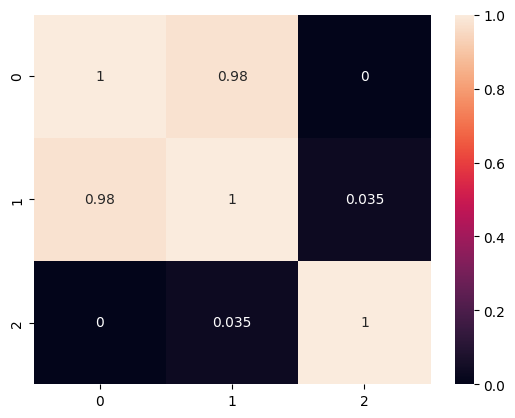

In [82]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True)

In [39]:
# 상관관계 행렬의 상삼각(upper triangle) 행렬을 선택합니다.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


In [40]:
# 상관 계수가 0.95보다 큰 특성 열의 인덱스를 찾습니다.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[1]

In [41]:
# 특성을 삭제합니다.
dataframe.drop(dataframe.columns[to_drop], axis=1)

,0,2
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
5,6,0
6,7,1
7,8,0
8,9,1


# 분류 작업에 관련 없는 특성 삭제하기

In [55]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# 데이터를 로드합니다.
iris = load_iris()
features = iris.data
target = iris.target

# 범주형 데이터를 정수형으로 변환합니다.
features = features.astype(int)
print(features[:3, :])
print(features.shape)
# 카이제곱 통계값이 가장 큰 특성 두 개를 선택합니다.
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

[[5 3 1 0]
 [4 3 1 0]
 [4 3 1 0]]
(150, 4)
원본 특성 개수: 4
줄어든 특성 개수: 2


- 카이제곱 통계는 두 범주형 벡터의 독립성 평가
    - 카이제곱 독립성검정의 귀무가설과 대립가설은 아래와 같습니다. 
    - 귀무가설 : 변수 X와 Y는 서로 독립이다. 
    - 대립가설 : 변수 X와 Y는 서로 독립이 아니다.
- 카이제곱 특성은, 관찰 빈도와 기대 빈도 사이의 차이가 얼마나 큰지 알려 줌
    - 카이제곱 통계 검정 값이 크면 (예: p-value가 낮은 경우), 특성 간에 독립성이 낮다고 판단합니다. 
    - 다시 말하면, 특성 간에 어떤 관계가 있다고 간주합니다.
- 특성과 타겟 벡터 사이의 카이제곱 통계를 계산하면, 둘 사이의 독립성 측정 가능
- 특성 변수가 타겟에 독립적이면 분류 문제에 사용 할 정보가 없기 때문에 목적에 맞지 않는다.
- 특성 선택에 카이제곱을 사용 하려면, 각 특성과 타겟 벡터 사이의 카이제곱 통계를 계산 해야
    -  카이제곱 통계 검정 값이 크면, 해당 특성이 타겟과 강하게 연관되어 있고, 그 결과로 좋은 특성으로 간주
- 사이킷런에서는 sklearn.feature_selection.SelectKBest 함수 사용
- 카이제곱 방식을 위해선 모든 변수가 음수가 아니어야
- iris 데이터의 특성은 수치형 이지만, 위 예제는 범주형 처럼 다룬 것임.

In [51]:
# F-값이 가장 높은 특성 두 개를 선택합니다.
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 2


- 특성이 수치형이라면, f_classif 를 사용, 각 특성과 타겟 벡터 사이의 분산분석(ANOVA)의 F-값 통계 계산
- F-값 점수는 타겟 벡터로 수치형 특성을 구룹핑 하여 각 그룹의 평균이 크게 차이나는 지를 평가
- 예) 이진 타겟 벡터인 성별과, 수치형 특성인 시험 점수, F-값 점수는 남성의 평균 테스트 점수가 여성의 평균 테스트 점수보다 다른지 설명

In [52]:
# 라이브러리를 임포트합니다.
from sklearn.feature_selection import SelectPercentile

# 가장 큰 F-값의 상위 75% 특성을 선택합니다.
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)

# 결과를 선택합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 3


# 재귀적 특성 제거하기

- RFE: Recursive Feature Elimination
- 주어진 모델(선형 회귀, SVM 등)을 사용하여 반복적으로 훈련하고 가장 중요하지 않은 특성을 순차적으로 제거하는 방법
- RFE는 모델을 통해 특성의 중요도를 평가하고, 그 중에서 중요도가 낮은 특성을 제거하여 모델의 성능을 개선하려는 목적으로 사용
- 맨 처음 모델을 훈련시에는 모든 특성을 포함
- 교차 검증으로 RFE 모델 평가, 특성 제거
- 가장 작은 파라미터를 가진 특성 찾아 제거
- 교차 검증으로 RFE 모델을 평가 하는 구현 : RFECV

In [84]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_regression(n_samples = 10000,
                                   n_features = 100,
                                   n_informative = 2,
                                   random_state = 1)

# 선형 회귀 모델을 만듭니다.
ols = linear_model.LinearRegression()

# 재귀적으로 특성을 제거합니다.
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error") # 매 반복시 삭제할 특성의 수
rfecv.fit(features, target)
features_2 = rfecv.transform(features)

In [87]:
features.shape

(10000, 100)

In [86]:
features_2.shape

(10000, 4)

In [88]:
# 최선의 특성 개수
rfecv.n_features_

4

In [89]:
# 선택된 특성이 표시된 불리언 마스크
rfecv.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])